**Zaczęte na dole**

# Regresja liniowa z regularyzacją

**UWAGA**: w tym notebooku znajduje się sporo tekstu, ale jego druga połowa to duże zadanie.

### Czytanka
Fajne tutoriale, dostarczające sporo intuicji:
* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
* Obszerny przykład, omawiający charakterystykę obydwu metod regularyzacji i wpływ doboru parametrów na sposób dopasowania: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* Konkurs na Kaggle, który dostarcza przydatnego zbioru danych: https://www.kaggle.com/apapiu/regularized-linear-models
* Opis implementacji: http://www.geeksforgeeks.org/linear-regression-python-implementation/
* (*) Implementacja prostej regresji liniowej (od zera): http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
* (\**) Implementacja regresji dla wielu zmiennych: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/
* Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent

### Podstawowe info
#### 1. Regresja w wielu wymiarach:
Bardzo często chcemy dopasować prostą do danych o większej wymiarowości. Przykładowo, cena domu może zależeć od jego powierzchni, ilości pokoi i ilości pięter (w praktyce takich cech danych może być bardzo dużo). Na szczęście idea jest w zasadzie identyczna, jak przy jednowymiarowej regresji z poprzednich zajęć. Zwróćmy uwagę, że gdy umiemy dopasowywać funkcję liniową w wielu wymiarach, możemy robić różne zagraniczne tricki: nikt nie broni nam sztucznie stworzyć sobie nowych zmiennych, będących nieliniowymi przekształceniami istniejących zmiennych. W ten sposób za pomocą jednego algorytmu możemy dopasowywać zarówno funkcje liniowe, jak i np. wielomiany. (Więcej: na zajęciach). <img src="images/dataset.jpg">

Swoją drogą, w internecie wymiennie można znaleźć pojęcia "multi(ple) regression" i "multivariate regression". Można założyć, że pierwsza z nich odnosi się do funkcji z wielowymiarową dziedziną, ale jednowymiarową przeciwdziedziną, natomiast to drugie: z wielowymiarową dziedziną i przeciwdziedziną.

#### 2. **Gradient descent**:
O ile dla małych/prostych zbiorów danych jesteśmy w stanie wyliczyć najlepsze dopasowanie analitycznie (por. MOwNiT 1, laboratorium), o tyle w praktyce zajęłoby to zbyt dużo czasu. Na szczęście minimalizować funkcję błędu możemy heurystycznie, za pomocą poruszania się w kierunku największego spadku. Intuicja: to tak, jakbyśmy chcieli znaleźć najniższe miejsce w jakiejś kotlinie poprzez rzucenie na ziemię metalowej kulki i sprawdzenie, gdzie się zatrzyma.
<img src="images/gradient_descent.png">
Tak prosta metoda może dość łatwo "utknąć" w minimum lokalnym, ale na szczęście funkcje, z którymi mamy do czynienia przy regresji liniowej są bardzo porządne i mają tylko jedno minimum.

#### 3. **Regularyzacja**:
Intuicja podpowiada "im więcej cech danych, tym lepiej je zrozumiemy". Niestety, życie (i konkursy na Kaggle) uczy, że to błędna intuicja. Część zmiennych nie wnosi żadnej informacji, dane są zaszumione, a czasem informacja jest redundantna. Co się dzieje, jeśli dwie cechy są mocno skorelowane? Jeśli są również mocno skorelowane z wartością, którą przewidujemy, zaczniemy tak naprawdę liczyć tą samą cechę, ale podwójnie (to intuicja, nie poprawne tłumaczenie).


### Pytania
* w jakich sytuacjach zwykła regresja daje złe rezultaty?
* dlaczego chcemy "karać" model za wysokie wagi?

### Zadanie rozgrzewkowe
1. Napisać regresję dla wielu wymiarów.


### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:
0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.


#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.

#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest [tutaj](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.

#### 4. Przetwarzanie danych
Oprócz usuwania outlierów i prostowania rozkładów możemy chcieć wykonać jeszcze szereg modyfikacji na danych, przykładowo:
* zakodować zmienne kategoryczne jako numerki (https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
* znormalizować dane
* usunąć szumy
* zmniejszyć wymiarowość

Tutaj użytkownikom Pythona warto polecić moduł [Scikit Learn](https://scikit-learn.org/stable/index.html).

#### 5. trenowanie modeli

Chcemy wytrenować na naszych danych łącznie cztery modele:
* Zwykłą regresję liniową
* Regresję z regularyzacją L1 (Lasso)
* Regresję z regularyzacją L2 (Ridge)
Wszystkie trzy są ładnie opisane [tutaj](https://scikit-learn.org/stable/modules/linear_model.html) oraz w linkach na górze strony.

Warto pamiętać o użyciu [kros-walidacji](https://scikit-learn.org/stable/modules/cross_validation.html) do trenowania modeli.

Będzie nas interesować, oprócz tego, który model osiąga najlepsze wyniki, zależność wyników Lasso i Ridge od doboru parametru regularyzacji (jeśli jest niejasne, jak to należy zrobić, warto zobaczyć kagglowy link z góry strony).

**UWAGA**: tym razem bardzo prosiłbym o sporządzenie PDF-ów z wynikami i opisami eksperymentów. Pliki \*.ipynb też są okej.

Powyższy opis używał przykładów dla języka Python. Dowolny język jest dopuszczalny, ale bardzo możliwe, że najrozsądniejszym wyborem będą jednak te ze zbioru {Python, R, Julia} ze wskazaniem na dwa pierwsze. W Julii dataframe'y są, ale nie mogę ręczyć, że wszystkie powyższe ficzery będą łatwo dostępne.

# Analiza cen domów w USA

Jako cel postawiliśmy sobie analizę danych cen domów w USA oraz znalezienie zależności ceny od parametrów domu.

Dane pobraliśmy ze strony Kaggle.

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Wczytanie danych

In [223]:
train_data: pd.DataFrame = pd.read_csv('data/train.csv').select_dtypes(['number']).drop(['Id'], 'columns')

In [224]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


### Usunięcie niepotrzebnych kolumn

Do analizy danych wykorzystamy wyłącznie dane liczbowe. Sens niektórych danych liczbowych jest zależny od pewnego pola opisowego, takich danych się pozbywamy.

In [225]:
train_data = train_data.drop(['MSSubClass', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath'], 'columns')

In [226]:
def trait_long_name(name):
    {}[name]

## Opisanie danych

### Podstawowe informacje

In [227]:
description = train_data.describe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(description)

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    10516.828082     6.099315     5.575342  1971.267808   1984.865753   
std      9981.264932     1.382997     1.112799    30.202904     20.645407   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7553.500000     5.000000     5.000000  1954.000000   1967.000000   
50%      9478.500000     6.000000     5.000000  1973.000000   1994.000000   
75%     11601.500000     7.000000     6.000000  2000.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea    BsmtUnfSF  TotalBsmtSF  LowQualFinSF    GrLivArea  \
count  1452.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    103.685262   567.240411  1057.429452      5.844521  1515.463699   
std     181.066207   441.866955   438.705324     48.623081   525.480383   
min   

### Brakujące dane

Widać, że w niektórych przypadku niektórych cech występuje brak danych. Usuwamy te cechy (np. rok wybudowania garażu.)

In [228]:
train_data = train_data.dropna(axis=1)

### Histogramy

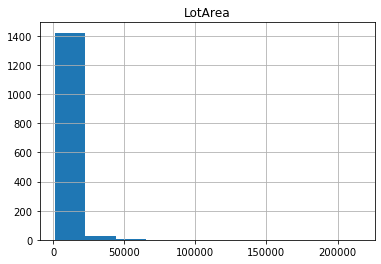

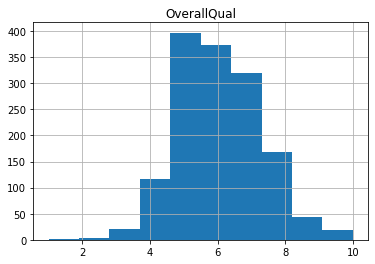

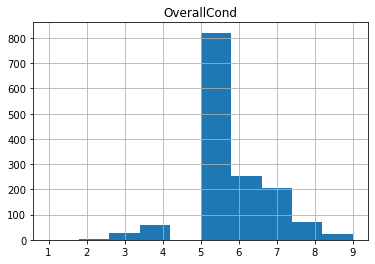

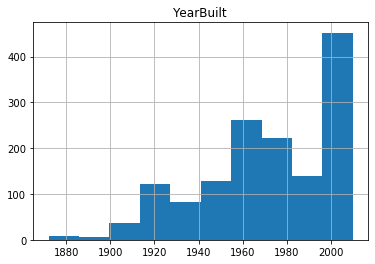

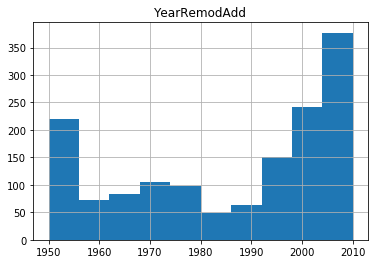

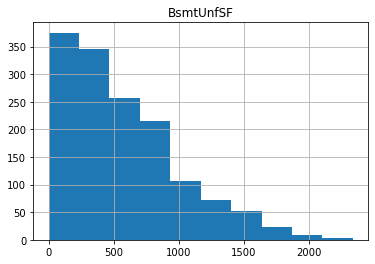

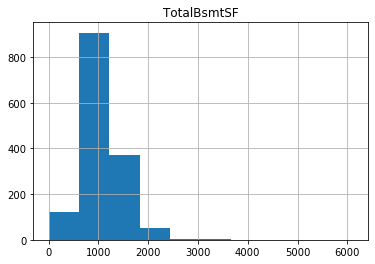

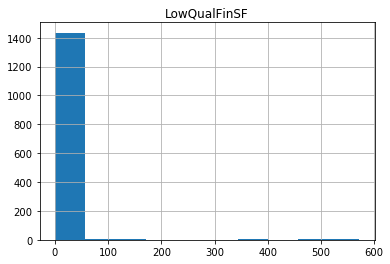

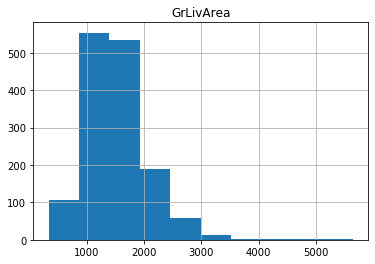

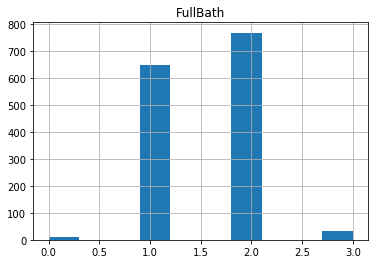

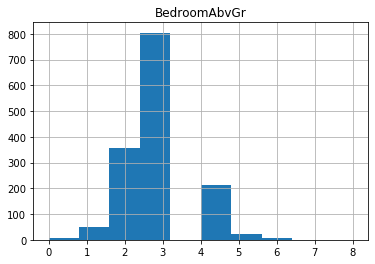

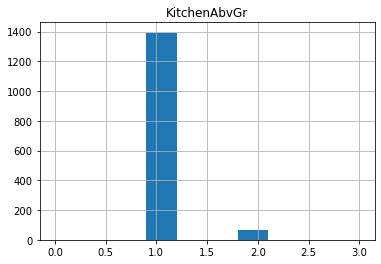

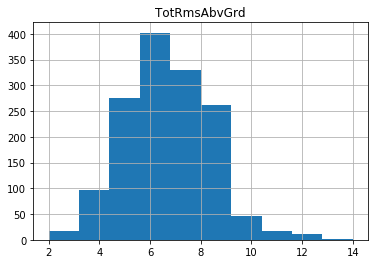

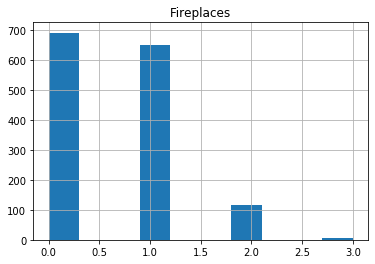

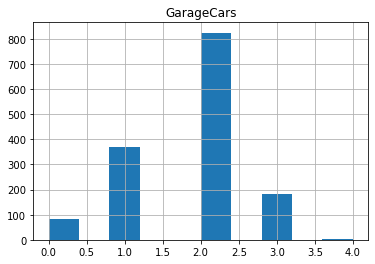

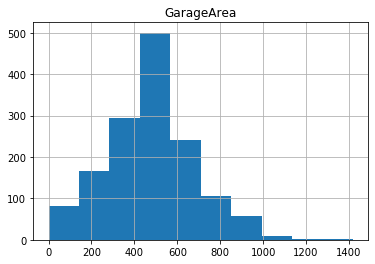

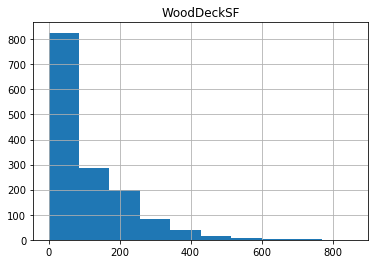

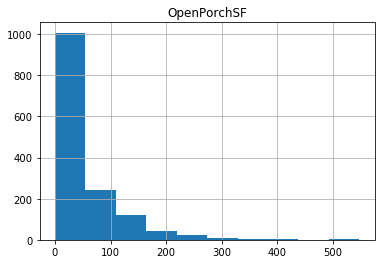

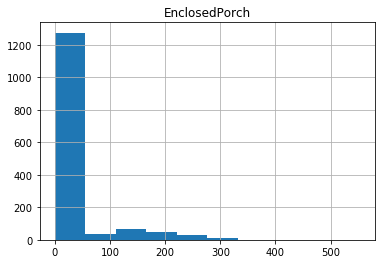

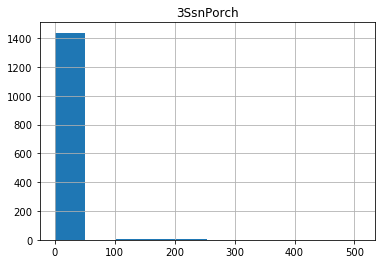

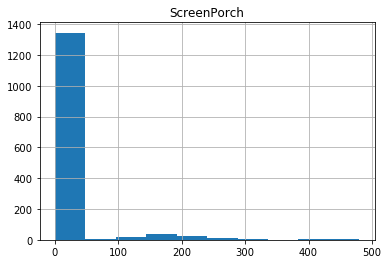

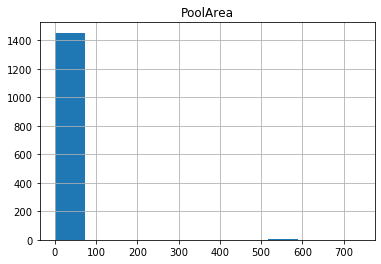

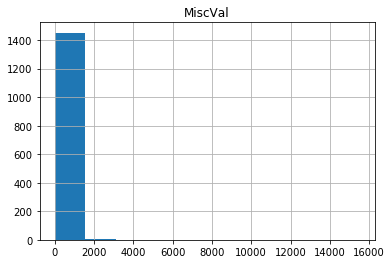

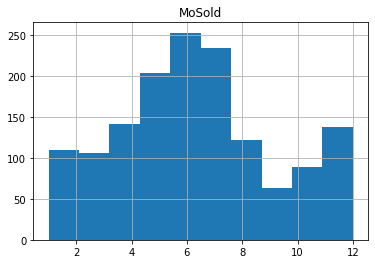

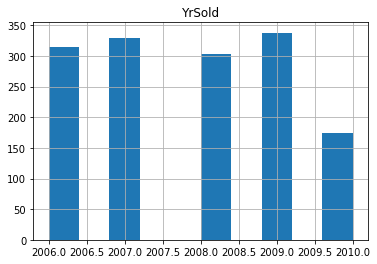

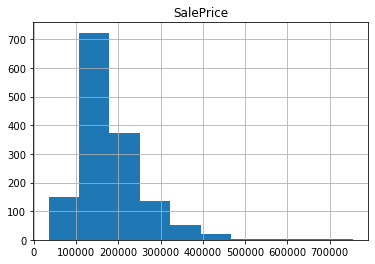

In [229]:
for trait in train_data:
    train_data.hist(column=trait)
    plt.title(trait)
    plt.ylabel('')
    plt.show()

### Wykresy pudełkowe

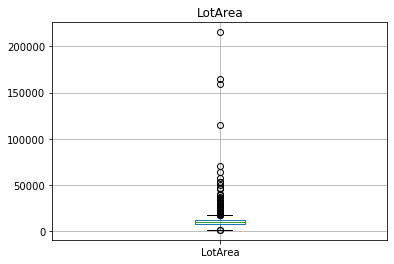

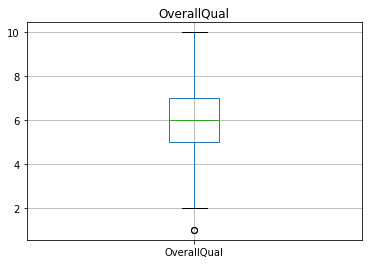

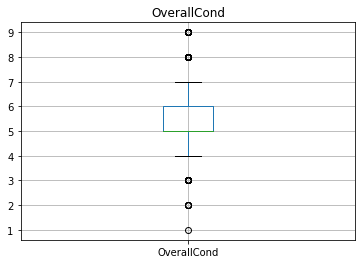

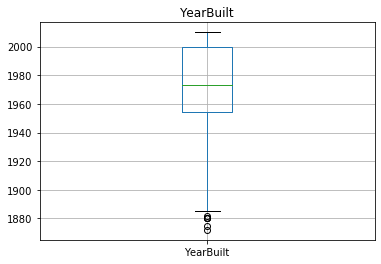

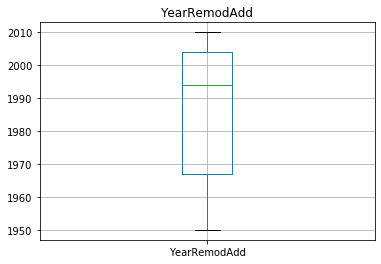

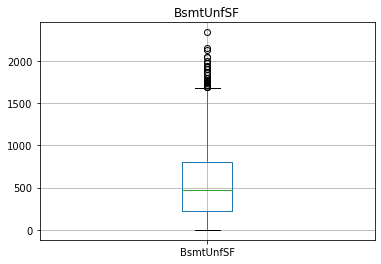

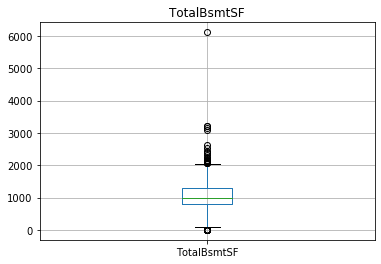

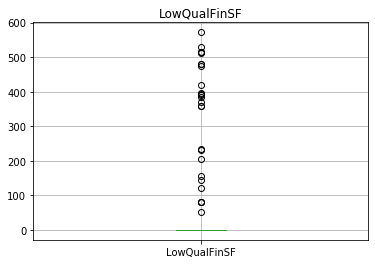

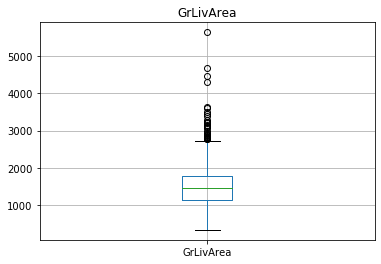

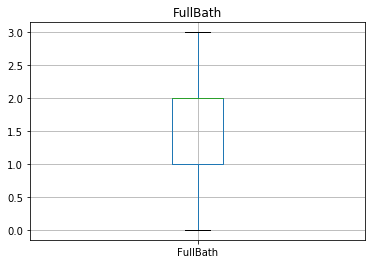

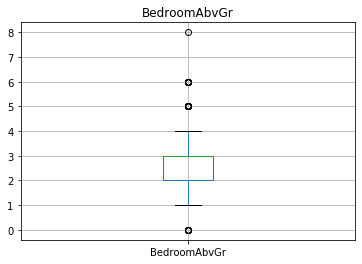

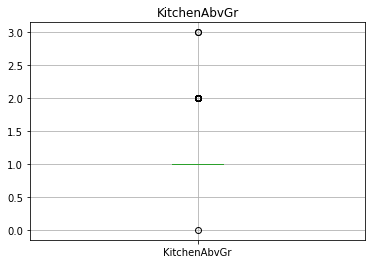

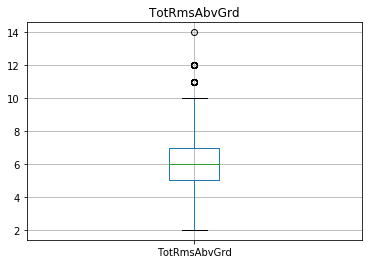

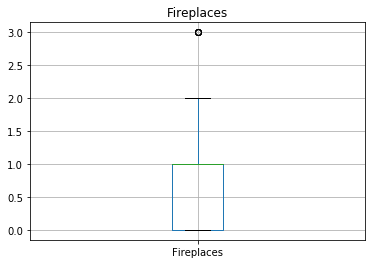

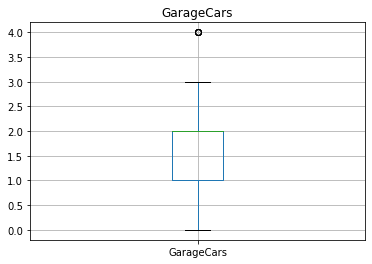

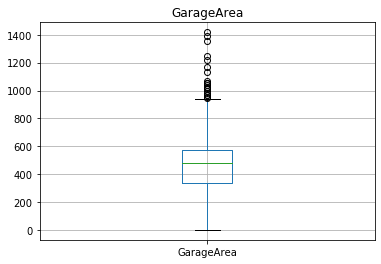

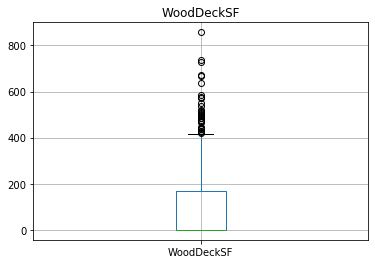

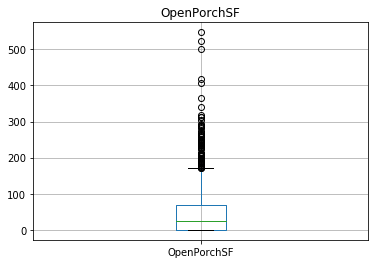

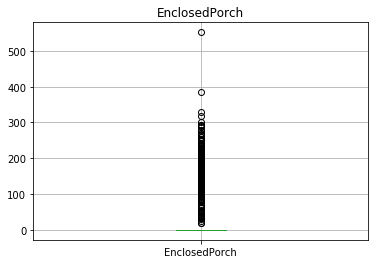

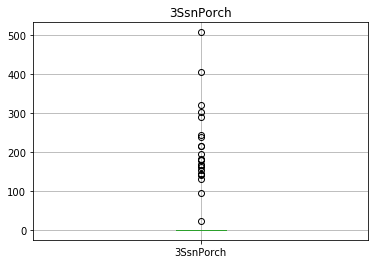

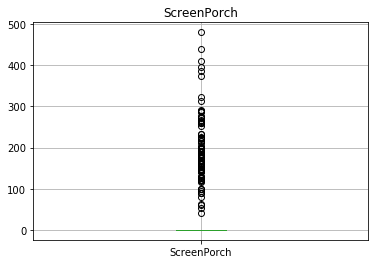

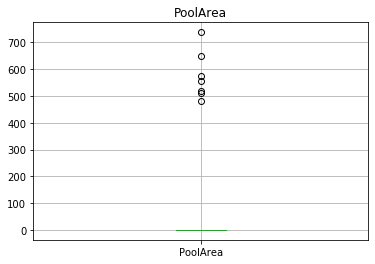

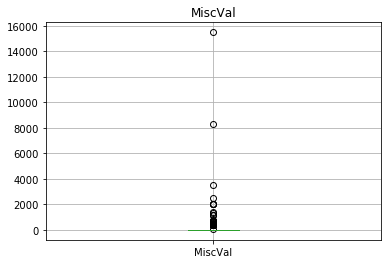

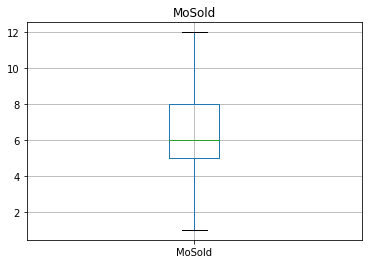

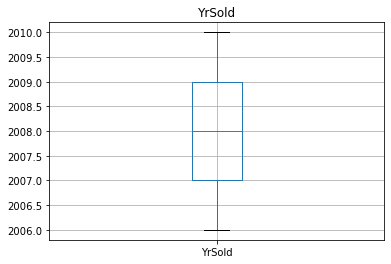

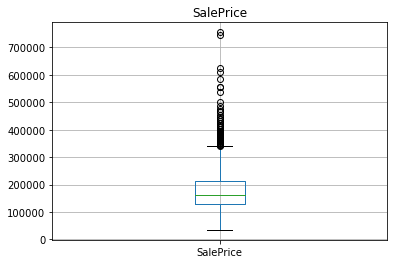

In [230]:
for trait in train_data:
    train_data.boxplot(column=trait)
    plt.title(trait)
    plt.ylabel('')
    plt.show()

### Wartości odstające

Po przejrzeniu powyższych wykresów kilka rzeczy rzuca się w oczy:

1. Przy niektórych cechach bardzo niewielki procent ma wartość różną od 0 (rozmiar basenu, rozmiary różnego rodzaju werand, wartość dodatkowych udogodnień, niewykończona powierzchnia)
1. Kilka cech ma dużo wartości odstających (powierzchnie, cena)

Aby rozwiązać te problemy:
1. Usuwamy wartości odstające cech opisanych powyżej
1. Usuwamy kolumny zawierające cechy, które zawsze mają wartość 0

In [231]:
def drop_non_zero(df, name):
    df = df[df[name] == 0]
    return df.drop([name], 'columns')

In [232]:
def drop_quantile(df, name, low=0, high=1):
    q_low = df[name].quantile(low)
    q_high = df[name].quantile(high)
    return df[df[name].between(q_low, q_high)]

In [233]:
train_data = drop_non_zero(train_data, 'PoolArea')
train_data = drop_non_zero(train_data, '3SsnPorch')
train_data = drop_non_zero(train_data, 'ScreenPorch')
train_data = drop_non_zero(train_data, 'MiscVal')
train_data = drop_non_zero(train_data, 'LowQualFinSF')

In [234]:
train_data = drop_quantile(train_data, 'LotArea', high=0.95)
train_data = drop_quantile(train_data, 'GrLivArea', high=0.95)
train_data = drop_quantile(train_data, 'GarageArea', high=0.95)
train_data = drop_quantile(train_data, 'SalePrice', high=0.95)

### Dane oczyszczone

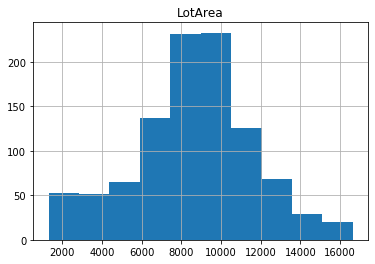

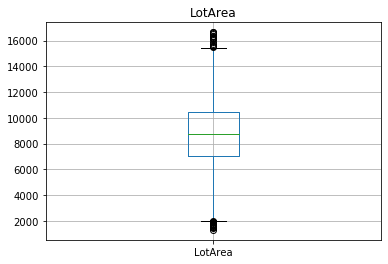

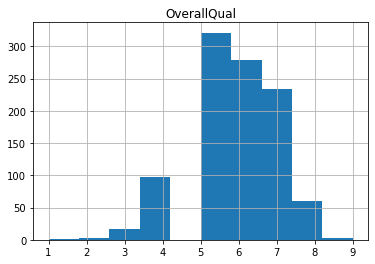

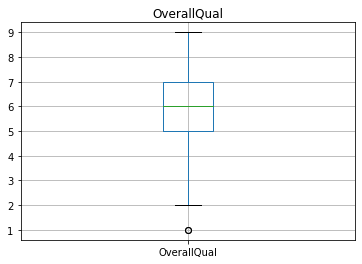

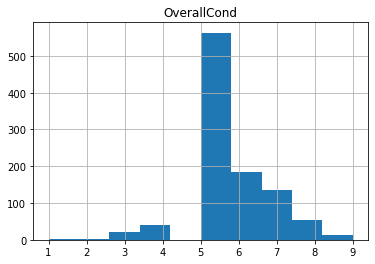

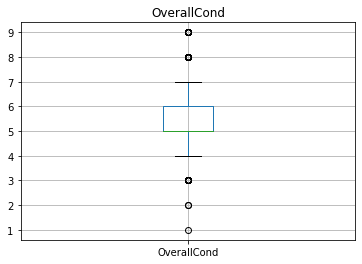

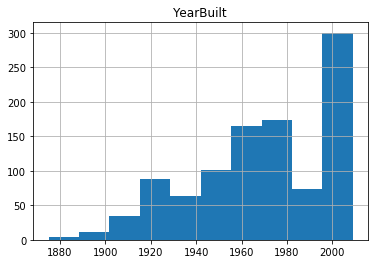

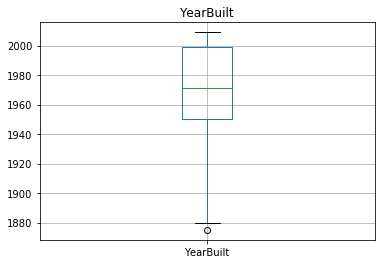

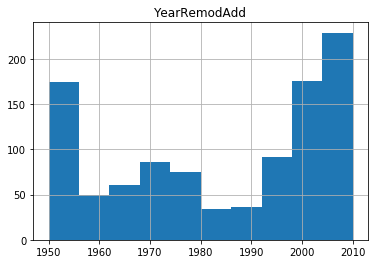

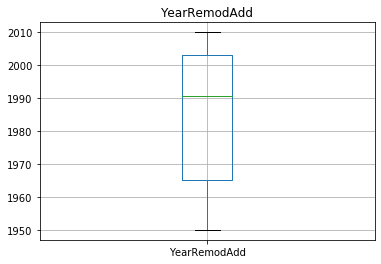

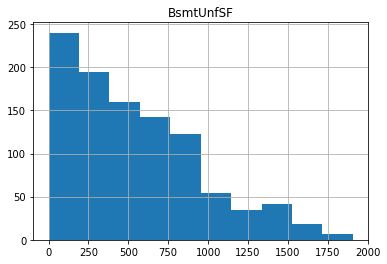

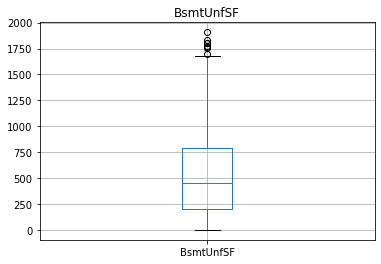

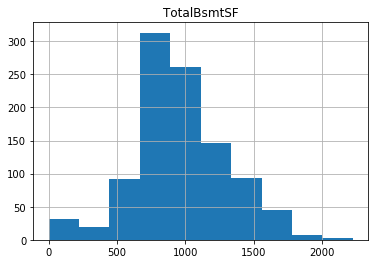

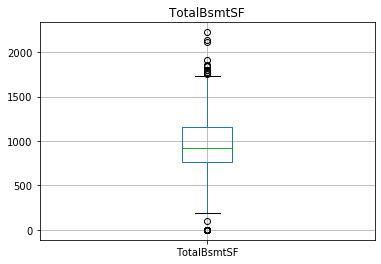

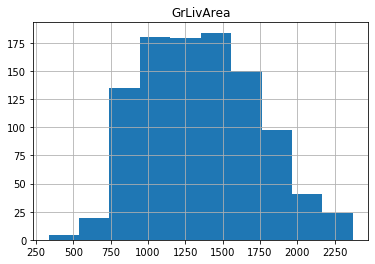

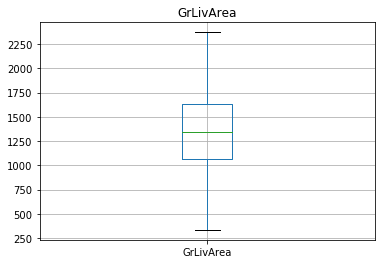

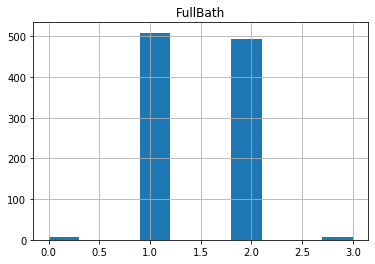

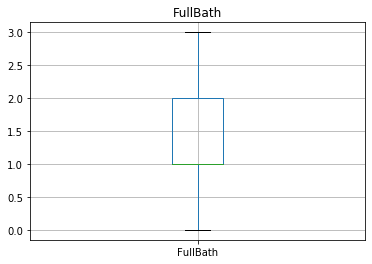

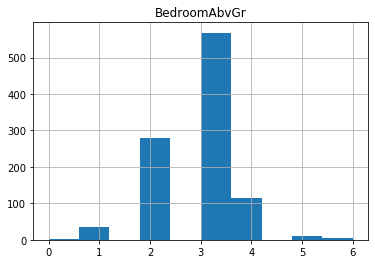

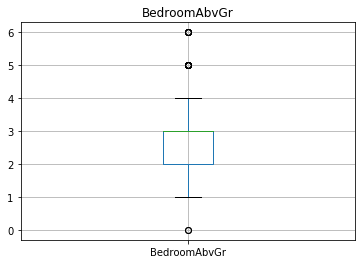

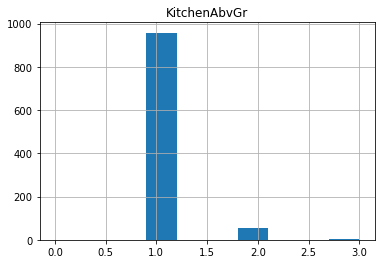

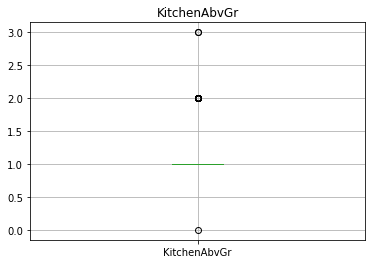

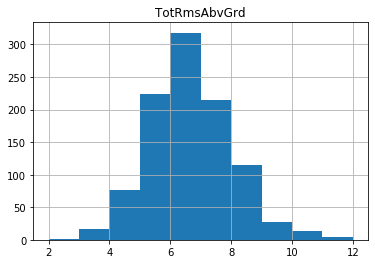

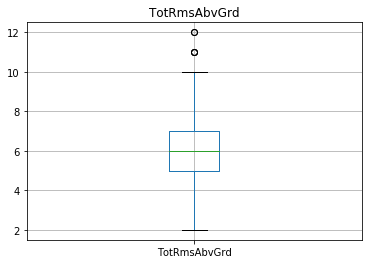

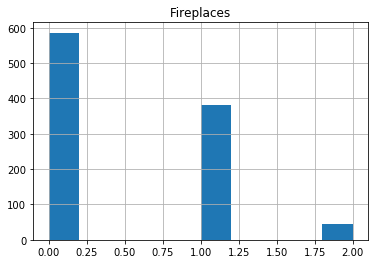

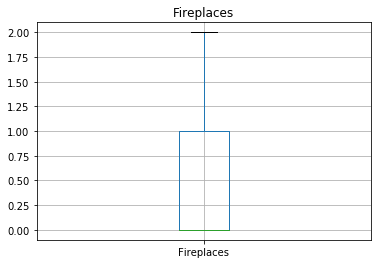

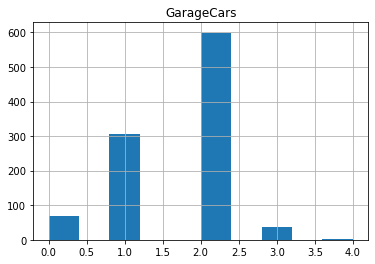

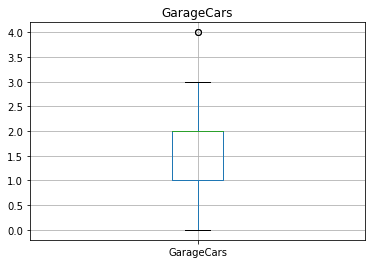

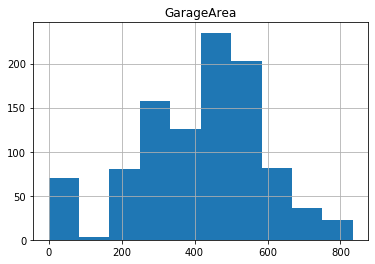

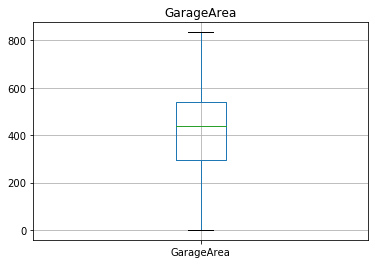

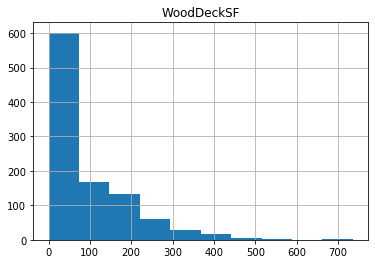

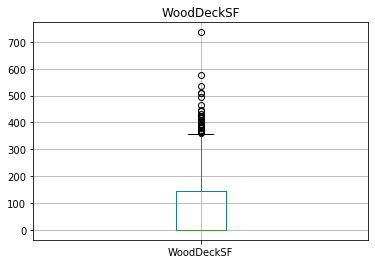

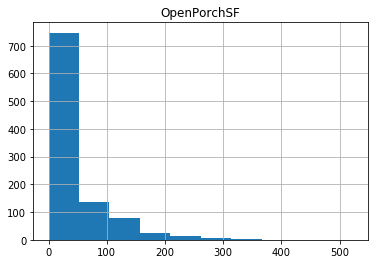

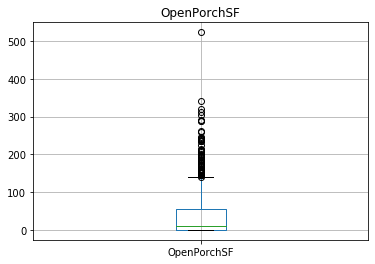

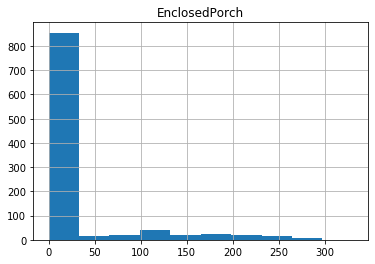

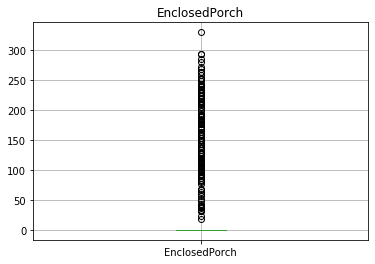

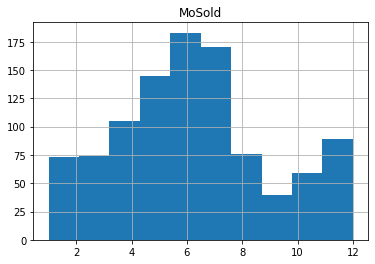

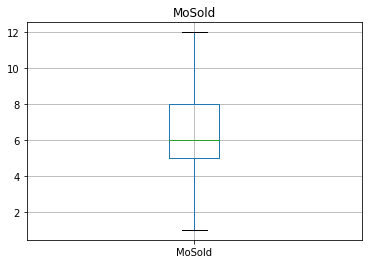

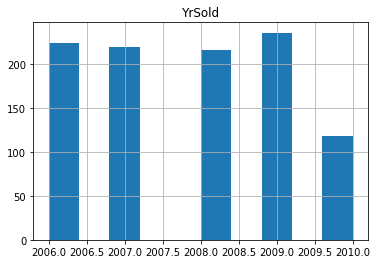

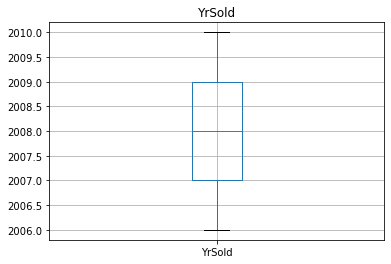

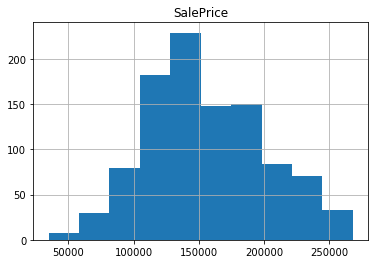

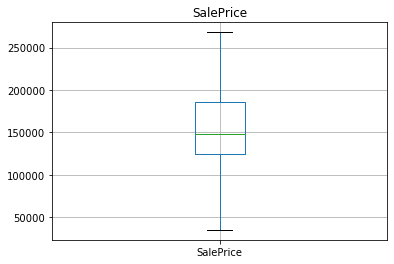

In [236]:
for trait in train_data:
    train_data.hist(column=trait)
    plt.title(trait)
    plt.show()
    train_data.boxplot(column=trait)
    plt.title(trait)
    plt.show()

In [237]:
len(train_data)

1014

## Przetwarzanie danych

## Przewidywanie cen mieszkań